## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Лабораторная работа №5

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [2]:
average_ratings = np.load('average_ratings.npy')
average_ratings[0]

array([5.        , 5.01310274, 5.02623981, ..., 5.52281922, 5.53729203,
       5.52281922])

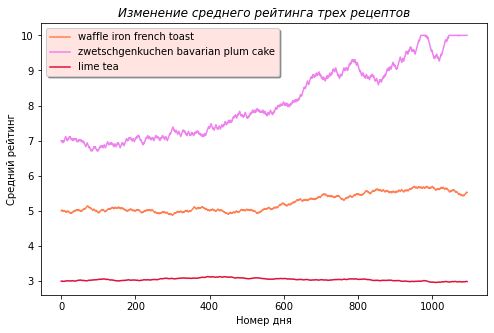

In [3]:
fig, ax = plt.subplots()

ax.plot(average_ratings[0], color = 'coral', 
        label = 'waffle iron french toast')
ax.plot(average_ratings[1], color = 'violet', 
        label = 'zwetschgenkuchen bavarian plum cake')
ax.plot(average_ratings[2], color = 'crimson', 
        label = 'lime tea')

ax.set_title('Изменение среднего рейтинга трех рецептов',
                fontstyle = 'italic',)
ax.legend(shadow = True,
         facecolor = 'mistyrose')

fig.set_figheight(5)
fig.set_figwidth(8)

ax.set_xlabel('Номер дня')
ax.set_ylabel('Средний рейтинг')

plt.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


In [216]:
pd.date_range(start='01/01/2019', end='30/12/2021')

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
               '2021-12-25', '2021-12-26', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30'],
              dtype='datetime64[ns]', length=1095, freq='D')

In [217]:
date_plot = pd.to_datetime(pd.date_range(start='01/01/2019', end='30/12/2021'), format='YY-mm-dd')
date_plot

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
               '2021-12-25', '2021-12-26', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30'],
              dtype='datetime64[ns]', length=1095, freq='D')

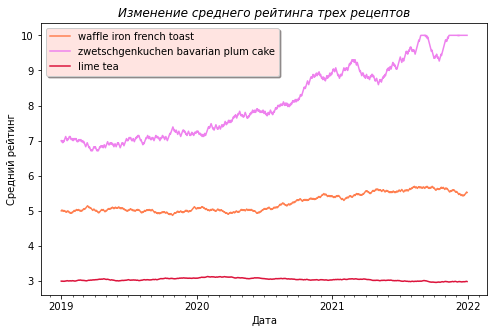

In [229]:
fig, ax = plt.subplots()

ax.plot(date_plot, average_ratings[0], color = 'coral', 
        label = 'waffle iron french toast')
ax.plot(date_plot, average_ratings[1], color = 'violet', 
        label = 'zwetschgenkuchen bavarian plum cake')
ax.plot(date_plot, average_ratings[2], color = 'crimson', 
        label = 'lime tea')

ax.set_title('Изменение среднего рейтинга трех рецептов',
                fontstyle = 'italic',)
ax.legend(shadow = True,
         facecolor = 'mistyrose')

fig.set_figheight(5)
fig.set_figwidth(8)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())

ax.set_xlabel('Дата')
ax.set_ylabel('Средний рейтинг')

plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

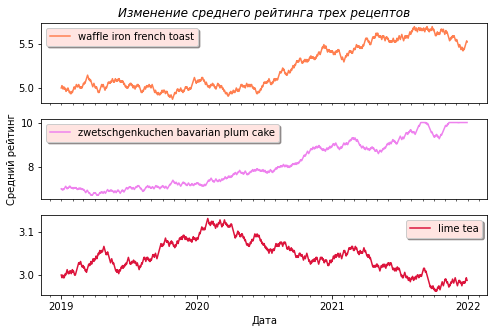

In [272]:
fig = plt.figure()

ax_1 = fig.add_subplot(3, 1, 1)
ax_2 = fig.add_subplot(3, 1, 2)
ax_3 = fig.add_subplot(3, 1, 3)

ax_1.plot(average_ratings[0], color = 'coral', 
        label = 'waffle iron french toast')
ax_1.set_xticks([])
ax_1.xaxis.set_minor_locator(mdates.MonthLocator())

ax_2.plot(average_ratings[1], color = 'violet', 
        label = 'zwetschgenkuchen bavarian plum cake')
ax_2.set_xticks([])
ax_2.xaxis.set_minor_locator(mdates.MonthLocator())

ax_3.plot(date_plot, average_ratings[2], color = 'crimson', 
        label = 'lime tea')

ax_1.set_title('Изменение среднего рейтинга трех рецептов',
                fontstyle = 'italic',)

ax_1.legend(shadow = True,
         facecolor = 'mistyrose')
ax_2.legend(shadow = True,
         facecolor = 'mistyrose')
ax_3.legend(shadow = True,
         facecolor = 'mistyrose')

fig.set_figheight(5)
fig.set_figwidth(8)

ax_3.xaxis.set_major_locator(mdates.YearLocator())
ax_3.xaxis.set_minor_locator(mdates.MonthLocator())

ax_3.set_xlabel('Дата')
ax_2.set_ylabel('Средний рейтинг')

plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


In [25]:
visitors = np.load('visitors.npy')
visitors[:10]

array([2311, 2023, 1839, 1523, 1371, 1217, 1098,  958,  862,  724],
      dtype=int32)

In [88]:
y_100 = np.zeros(100) + 100

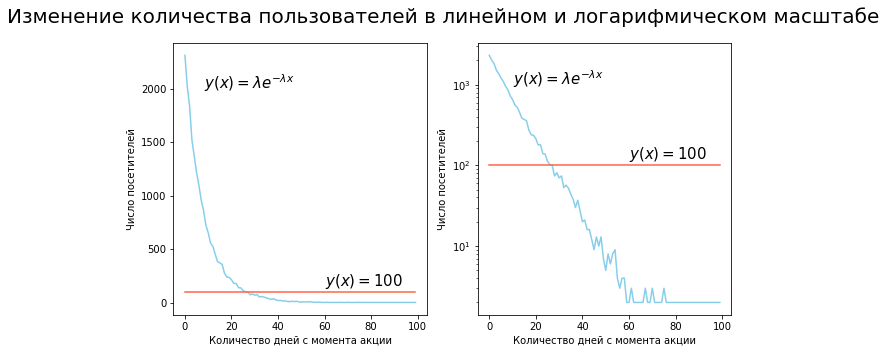

In [109]:
fig = plt.figure()

ax_1 = fig.add_subplot(1, 2, 1)
ax_2 = fig.add_subplot(1, 2, 2)

ax_1.plot(visitors, color = 'skyblue')
ax_1.text(8, 2000, r'$y(x)=\lambda e^{-\lambda x}$',
        fontsize = 15)
ax_1.plot(y_100, color = 'tomato')
ax_1.text(60, 160, r'$y(x)=100$',
        fontsize = 15)
ax_1.set_xlabel('Количество дней с момента акции')
ax_1.set_ylabel('Число посетителей')


ax_2.plot(visitors, color = 'skyblue')
ax_2.set_yscale('log')
ax_2.text(10, 1000, r'$y(x)=\lambda e^{-\lambda x}$',
        fontsize = 15)
ax_2.plot(y_100, color = 'tomato')
ax_2.text(60, 120, r'$y(x)=100$',
        fontsize = 15)
ax_2.set_xlabel('Количество дней с момента акции')
ax_2.set_ylabel('Число посетителей')

fig.set_figheight(5)
fig.set_figwidth(10)

fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе',
             fontsize = 20)

plt.show()

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [2]:
reviews = pd.read_csv('reviews_sample.csv', sep = ',', index_col = 0)
recipes = pd.read_csv('recipes_sample.csv', sep = ',')

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [28]:
recipes.minutes

0         90
1         10
2         30
3         45
4         25
        ... 
29995     80
29996    240
29997     75
29998     60
29999     29
Name: minutes, Length: 30000, dtype: int64

In [3]:
#сделали отдельно переменную с опознаванием рецепта - 0-короткий, 1-средний, 2-длинный

minutes_n = np.where((recipes.minutes >= 5) & (recipes.minutes < 50), 
                                1, 
                                np.where(recipes.minutes >= 50, 2, 0))
    
minutes_n

array([2, 1, 1, ..., 2, 2, 1])

In [4]:
recipes_copy = recipes
recipes_copy['minutes_n'] = minutes_n

In [5]:
mean_n_steps = recipes_copy.groupby([minutes_n])['n_steps'].agg('mean')
count_n_steps = recipes_copy.groupby([minutes_n])['minutes_n'].agg('count')

In [48]:
mean_n_steps.index = ['короткие', 'средние', 'длинные']
count_n_steps.index = ['короткие', 'средние', 'длинные']

In [51]:
total = count_n_steps.sum()

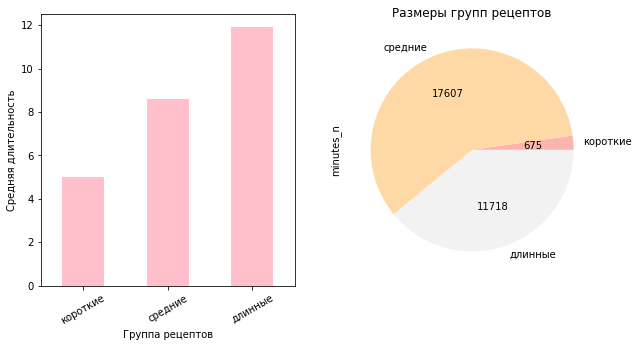

In [52]:
fig = plt.figure()
fig.add_subplot(1, 2, 1)

mean_n_steps.plot(kind='bar', color = 'pink')
plt.xlabel('Группа рецептов')
plt.ylabel('Средняя длительность')
plt.xticks(rotation=30, horizontalalignment="center")

fig.add_subplot(1, 2, 2)
count_n_steps.plot(kind='pie', cmap = 'Pastel1', autopct = lambda p: '{:.0f}'.format(p * total / 100))
plt.title('Размеры групп рецептов')

fig.set_figheight(5)
fig.set_figwidth(10)
plt.show()

#какие цвета... я их выбирала 15 минут

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

In [128]:
reviews_copy = reviews
reviews_copy['date'] = pd.to_datetime(reviews_copy['date'], format = '%Y-%m-%d')

In [148]:
reviews_copy = reviews_copy[(reviews_copy.date.dt.year == 2008) | (reviews_copy.date.dt.year == 2009)]

In [151]:
reviews_copy.date = reviews_copy.date.dt.year

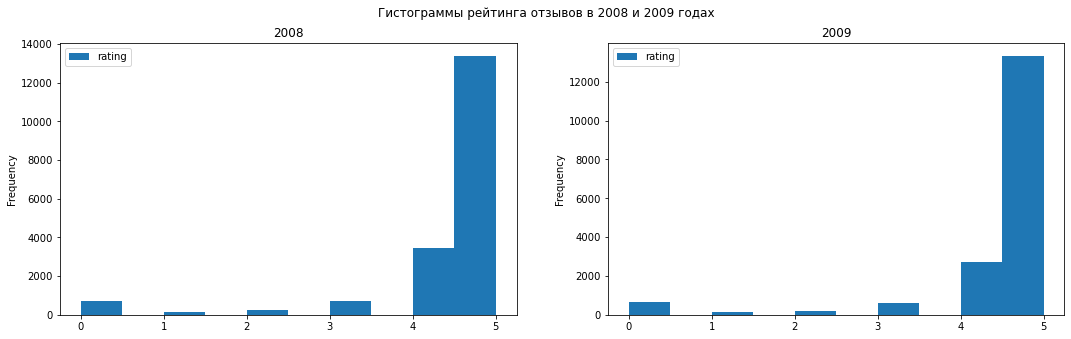

In [177]:
ax = reviews_copy.plot.hist(column=['rating'], by='date', layout = (1,2), figsize = (18,5), 
                           title = 'Гистограммы рейтинга отзывов в 2008 и 2009 годах')

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

In [7]:
recipes = recipes_copy

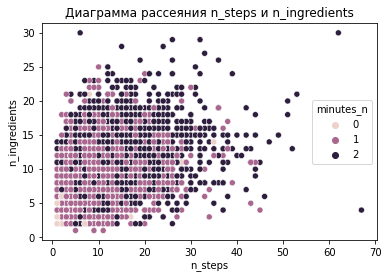

In [52]:
gr = sns.scatterplot( x = 'n_steps', y = 'n_ingredients', hue = 'minutes_n', data = recipes)
gr.set_title('Диаграмма рассеяния n_steps и n_ingredients')
plt.show()

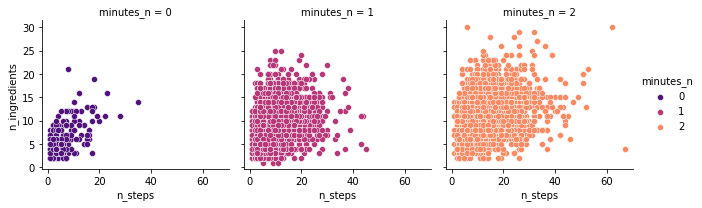

In [21]:
grid = sns.FacetGrid(recipes, col = 'minutes_n', hue = 'minutes_n', col_wrap = 3, palette = 'magma')
grid.map(sns.scatterplot, 'n_steps', 'n_ingredients')
grid.add_legend()

### вывод

вот тут хотя бы различить можно все <br>
самые короткие рецепты (0) - больше всего похоже на линейную зависимость, думаю где-то 0.65-0.7 <br>
(я играла в игру, где надо найти коэффициент корреляции на глаз - так что опыт есть аххаха)<br>
остальные как-то вообще не коррелируют

ссылка если интересно поиграть - http://guessthecorrelation.com

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

In [57]:
recipes_merge = pd.merge(recipes, reviews, left_on = 'id', right_on = 'recipe_id', how = 'right')
recipes_merge[['minutes', 'n_steps', 'n_ingredients', 'rating']].head()

,minutes,n_steps,n_ingredients,rating
0,50,NaN,NaN,5
1,30,NaN,11.0,5
2,27,6.0,4.0,4
3,18,6.0,NaN,5
4,115,12.0,10.0,5


In [58]:
recipes_merge[['minutes', 'n_steps', 'n_ingredients', 'rating']].corr()

,minutes,n_steps,n_ingredients,rating
minutes,1.000000,0.030675,-0.006254,-0.025770
n_steps,0.030675,1.000000,0.293526,-0.019057
n_ingredients,-0.006254,0.293526,1.000000,0.003405
rating,-0.025770,-0.019057,0.003405,1.000000


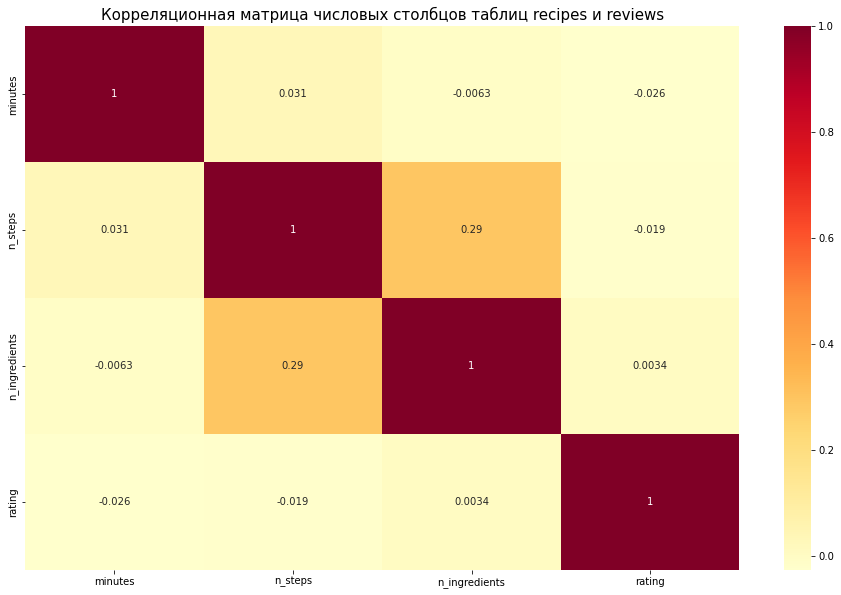

In [71]:
plt.figure(figsize=(16, 10)) 
heatmap = sns.heatmap(recipes_merge[['minutes', 'n_steps', 'n_ingredients', 'rating']].corr(), annot = True,
                     cmap = 'YlOrRd')
heatmap.set_title('Корреляционная матрица числовых столбцов таблиц recipes и reviews', 
                 fontdict={'fontsize':15})
plt.show()